In [1]:
# Iris data
import seaborn as sns
iris = sns.load_dataset('iris')
X = iris.drop('species', axis=1)
y=iris['species'] 

from sklearn.preprocessing import LabelEncoder
classle=LabelEncoder()
y=classle.fit_transform(iris['species'].values) 

from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=1, stratify=y)


In [2]:
# random forest, SVM, logistic regression을 통해 iris 품종을 분류
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_cl=LogisticRegression()
rf_cl=RandomForestClassifier()
svm_cl=SVC()
voting_cl=VotingClassifier(estimators=[('lr', log_cl), ('rf', rf_cl), ('svc', svm_cl)],voting='hard')
voting_cl.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for cl in (log_cl, rf_cl, svm_cl, voting_cl):
    cl.fit(X_train, y_train)
    y_pred = cl.predict(X_test)
    print(cl.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9777777777777777
RandomForestClassifier 0.9777777777777777
SVC 0.9777777777777777
VotingClassifier 0.9777777777777777


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py

In [3]:
# Bagging learning - 500개의 decision tree 이용
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_cl = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True)
# max_sample은 표본의 크기인데 60%를 이용하려면 max_sample=0.6을 설정.

bag_cl.fit(X_train, y_train)
y_pred = bag_cl.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9777777777777777


In [4]:
# out_of_bag (oob) 자료를 이용하여 test set의 accuracy 구함
# oob 자료는 oob_score = True로 지정.
bag_cl2 = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, n_jobs=-1,bootstrap=True, oob_score=True)
bag_cl2.fit(X_train, y_train)
print(bag_cl2.oob_score_)

0.9333333333333333


In [5]:
# Iris data에 M=500인 AdaBoost 적용
from sklearn.ensemble import AdaBoostClassifier
ada_t = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=500, random_state=1)
ada_t.fit(X_train, y_train)
y_train_pred=ada_t.predict(X_train)
y_test_pred=ada_t.predict(X_test)

from sklearn.metrics import accuracy_score
ada_train=accuracy_score(y_train, y_train_pred)
ada_test=accuracy_score(y_test, y_test_pred)

print("Adaboost train/test accuracy %0.3f/%0.3f" %(ada_train, ada_test))

Adaboost train/test accuracy 1.000/0.978


In [6]:
# Iris data에 기울기 부스팅 적용
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
gbcl=GradientBoostingClassifier(n_estimators=100, max_depth=2) # M=100, 나무 깊이=2
gbcl.fit(X_train, y_train)
accuracies=[accuracy_score(y_test,y_pred) for y_pred in gbcl.staged_predict(X_test)]
best_n_estimator=np.argmax(accuracies)
gbcl_best=GradientBoostingClassifier(max_depth=2, n_estimators=best_n_estimator)
gbcl_best.fit(X_train, y_train)
y_train_pred=gbcl_best.predict(X_train)
y_test_pred=gbcl_best.predict(X_test)
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))
print(best_n_estimator)


0.9523809523809523
0.9555555555555556
1


In [1]:
# House data에 회귀나무모형 적용. 
# 추정된 회귀선이 step 함수 형태의 비선형임을 보여줌.
import pandas as pd
house = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-2nd-edition'
                 '/master/code/ch10/housing.data.txt',header=None,sep='\s+')
house.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

from sklearn.tree import DecisionTreeRegressor
X = house[['LSTAT']].values
y = house['MEDV'].values
tree = DecisionTreeRegressor(max_depth=4)
tree.fit(X, y)
sort_idx = X.flatten().argsort()

def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return None

import matplotlib.pyplot as plt
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

<Figure size 640x480 with 1 Axes>

In [8]:
# House data에 random forest 모형을 적용.
# 1000개의 회귀나무를 이용하며 노드를 분류할 때 MSE 사용.
X=house.iloc[:, :-1].values
y=house['MEDV'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=500, criterion='mse', random_state=1)
forest.fit(X_train, y_train)
y_train_pred=forest.predict(X_train)
y_test_pred=forest.predict(X_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('MSE train : %0.3f, test: %0.3f' %(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R**2 train : %0.3f, test: %0.3f' %(r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

MSE train : 1.573, test: 8.316
R**2 train : 0.981, test: 0.909


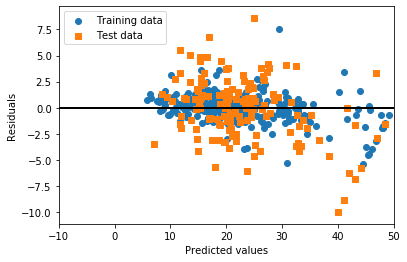

In [10]:
plt.scatter(y_train_pred, y_train_pred - y_train,marker='o',label='Training data')
plt.scatter(y_test_pred,y_test_pred - y_test,marker='s',label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2)
plt.xlim([-10, 50]) 
plt.show()

In [2]:
import pandas as pd
house = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-2nd-edition'
                 '/master/code/ch10/housing.data.txt',header=None,sep='\s+')
house.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
house.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [10]:
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


In [11]:
house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [3]:
# House data에 xboost 적용.
# 
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

X=house.iloc[:, :-1].values
y=house['MEDV'].values
data_dim=xgb.DMatrix(data=X, label=y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

xg_reg=xgb.XGBRegressor(objective='reg:squarederror',booster='gbtree',colsample_bytree=0.75, 
                        learning_rate=0.1,max_depth=5, alpha=10, n_estimators=30)
xg_reg.fit(X_train, y_train)
pred_train=xg_reg.predict(X_train)
pred_test=xg_reg.predict(X_test)
rmse_train=np.sqrt(mean_squared_error(y_train,pred_train))
rmse_test=np.sqrt(mean_squared_error(y_test,pred_test))
print('RMSE train : %0.3f, test: %0.3f' %(rmse_train, rmse_test))


RMSE train : 2.034, test: 3.427


In [7]:
!pip install lightgbm
!pip install --upgrade pip

Requirement already up-to-date: pip in c:\anaconda3\lib\site-packages (19.3.1)


In [5]:
from lightgbm import LGBMRegressor
lgbm_reg=LGBMRegressor(booster='gbtree',colsample_bytree=0.75, learning_rate=0.1,max_depth=5, 
                       alpha=10, n_estimators=30)
lgbm_reg.fit(X_train, y_train)
pred_train=lgbm_reg.predict(X_train)
pred_test=lgbm_reg.predict(X_test)
rmse_train=np.sqrt(mean_squared_error(y_train,pred_train))
rmse_test=np.sqrt(mean_squared_error(y_test,pred_test))
print('RMSE train : %0.3f, test: %0.3f' %(rmse_train, rmse_test))

RMSE train : 2.963, test: 3.433


In [14]:
paras={'objective':'reg:squarederror','colsample_bytree':0.6,'max_depth':5, 'alpha':10}
data_dim1=xgb.DMatrix(data=X_train,label=y_train)
cv_result=xgb.cv(dtrain=data_dim1, params=paras, nfold=5,num_boost_round=60, 
                 early_stopping_rounds=20,metrics='rmse', as_pandas=True, seed=1)
cv_result.head()



,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,17.139679,0.223515,17.271275,1.054852
1,12.606229,0.223895,12.896409,1.042451
2,9.444665,0.226033,9.855797,1.089853
3,7.218817,0.181744,7.906023,1.086968
4,5.632334,0.200208,6.552482,1.144863


In [15]:
print(cv_result['test-rmse-mean'].tail(1))

59    3.865178
Name: test-rmse-mean, dtype: float64


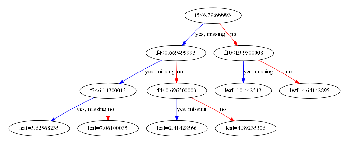

In [16]:
xg_reg1=xgb.train(params=paras, dtrain=data_dim1, num_boost_round=60)
                
import matplotlib.pyplot as plt
xgb.plot_tree(xg_reg1,num_trees=0)
plt.rcParams['figure.figsize']=[50,10]
plt.show()

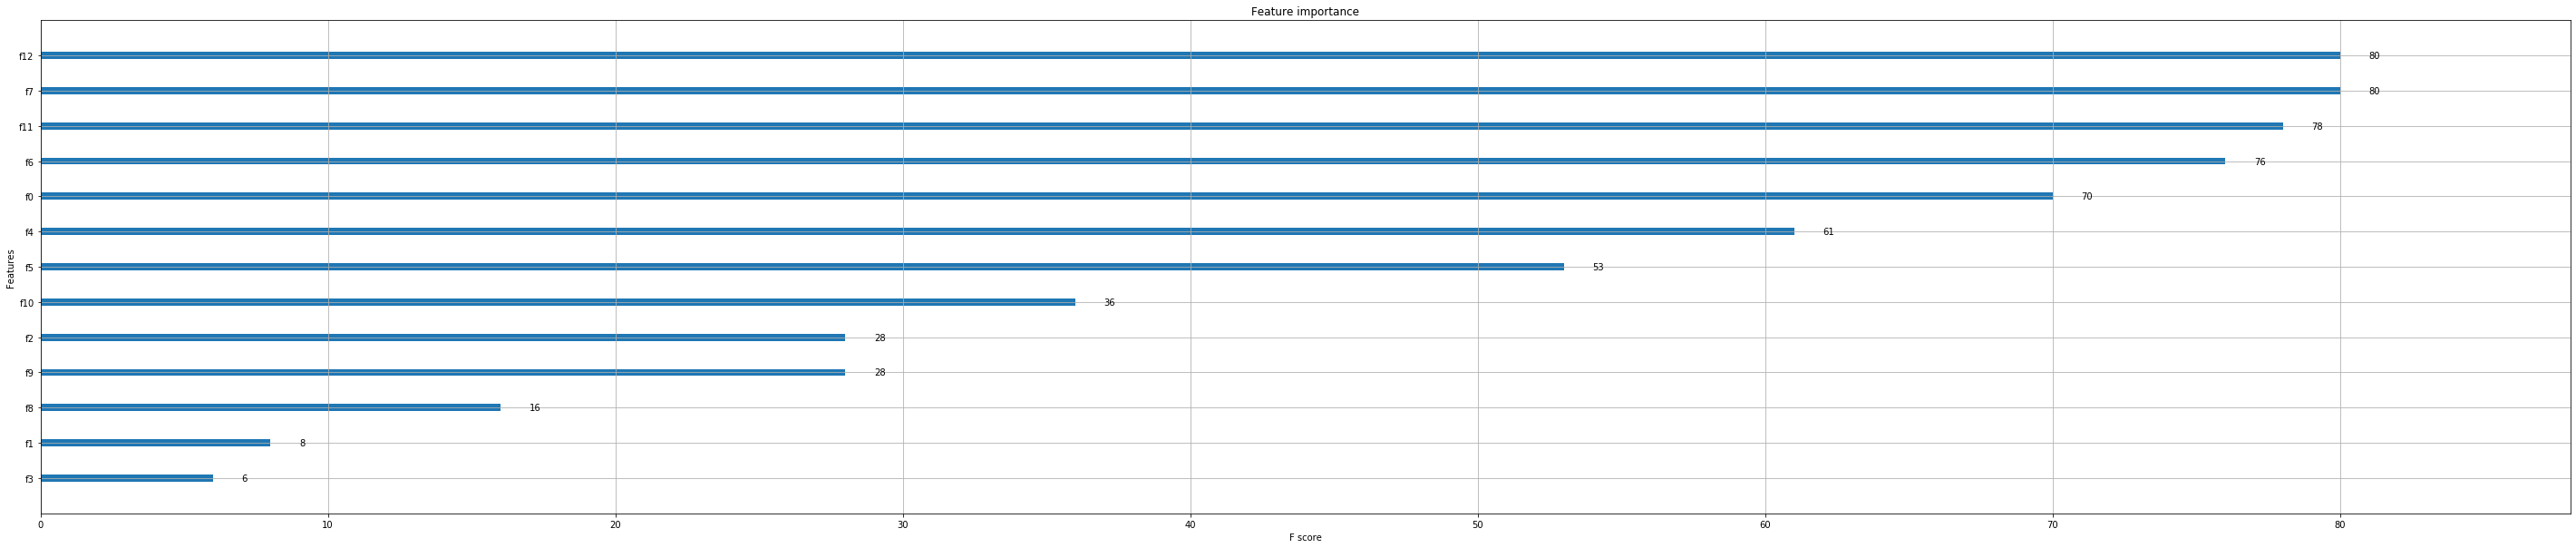

In [19]:
xgb.plot_importance(xg_reg1)
plt.rcParams['figure.figsize']=[5,5]
plt.show()

In [17]:
from sklearn.model_selection import GridSearchCV
param={'max_depth':range(3,10,2),'colsample_bytree':[i/100.0 for i in range(75,90,5)]}
xgsearch=GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror', max_depth=5,alpha=10),param_grid=param,
                      scoring='neg_mean_squared_error', cv=5)
xgsearch.fit(X_train,y_train)
xgsearch.best_params_, xgsearch.best_score_

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


({'colsample_bytree': 0.75, 'max_depth': 5}, -12.103208228411457)

In [18]:
# 0~9까지 손글씨를 random forest를 이용해 식별.
# X 변수 : 8 by 8 pixel data를 64차원으로 전환한 것. 
from sklearn.datasets import load_digits
digits=load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


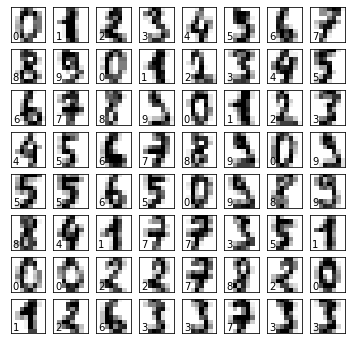

In [19]:
# 손글씨 이미지와 이에 대응하는 참 값
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(6,6)) # figure size in inches
for i in range(64):
    ax=fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(digits.target[i])) # ax.text는 참값을 손글씨 옆에 출력하는 명령어.

In [20]:
# 정밀도 계산
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(digits.data, digits.target, random_state=0)

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)
y_test_pred=rfc.predict(X_test)

from sklearn import metrics
print(metrics.classification_report(y_test_pred, y_test))

# Naive Bayes의 83%보다 월등하게 향상된 결과임.

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.98      0.99        44
           2       0.95      1.00      0.98        42
           3       0.98      0.96      0.97        46
           4       0.97      1.00      0.99        37
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [21]:
# House data에 기울기부스팅을 적용
# M=120, 나무 깊이는 3
import pandas as pd
house = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-2nd-edition'
                 '/master/code/ch10/housing.data.txt',header=None,sep='\s+')
house.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
from sklearn.tree import DecisionTreeRegressor
X=house.iloc[:, :-1].values
y=house['MEDV'].values

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

from sklearn.ensemble import GradientBoostingRegressor
gbrg=GradientBoostingRegressor(n_estimators=120, max_depth=3)
gbrg.fit(X_train, y_train)
errors=[mean_squared_error(y_test, y_pred) for y_pred in gbrg.staged_predict(X_test)]
bst_n_estimators=np.argmin(errors) # 가장 낮은 MSE를 보여주는 M을 결정함.
gbrg_best=GradientBoostingRegressor(max_depth=3, n_estimators=bst_n_estimators)
gbrg_best.fit(X_train, y_train)
y_train_pred=gbrg_best.predict(X_train)
y_test_pred=gbrg_best.predict(X_test)
from sklearn.metrics import mean_squared_error

print('MSE train : %0.3f, test: %0.3f' %(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print(gbrg_best.feature_importances_)
#(CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT') 중
# 5번째 Nox의 기여도가 26.6%, 12번 LSTAT의 기여도가 51.4%로 
# 두개의 특성변수가 78% 기여하는 것을 알 수 있음.

MSE train : 0.806, test: 10.536
[5.54831314e-02 3.99759237e-05 5.70128479e-03 6.21104369e-04
 1.65565038e-02 2.65869031e-01 1.00818455e-02 7.06500834e-02
 4.72551188e-03 1.55773149e-02 2.51386508e-02 1.59290254e-02
 5.13626537e-01]


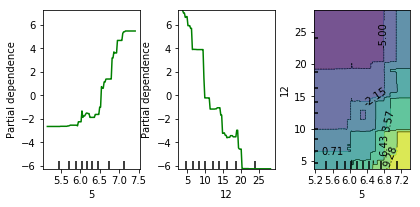

In [20]:
# 위 두개의 특성변수의 증가에 따른 목표변수의 변화를 살펴봄.
from sklearn.ensemble.partial_dependence import plot_partial_dependence
fig=plot_partial_dependence(gbrg_best, X_train, features=(5,12,(5,12)))  